In [13]:
from scipy import stats
from scipy.special import comb, perm, factorial, comb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)

### 베르누이 시행 (Bernoulli trial)
- 결과가 두 가지 중 하나로만 나오는 실험이나 시행
- 예를 들어 동전을 한 번 던져 앞면이 나오거나 뒷면이 나오게 하는 것도 베르누이 시행이다

### 베르누이 확률변수(Bernoulli random variable)
- 베르누이 시행의 결과를 실수 0 또는 1로 바꾼 것
- 베르누이 확률변수는 두 값 중 하나만 가질 수 있으므로 이산확률변수(discrete random variable)이다

### 베르누이 확률분포
- 베르누이 확률변수의 분포를 베르누이 확률분포 혹은 베르누이 분포라고 한다. 
- ${\displaystyle P(X=0)=p}$, ${\displaystyle P(X=1)=q}{\displaystyle P(X=1)=q}$, 
- ${\displaystyle 0\leq p\leq 1}{\displaystyle 0\leq p\leq 1}$, ${\displaystyle q=1-p}{\displaystyle q=1-p}$

In [2]:
# 숫자 1부터 10까지 적혀있는 카드가 10장 있다. 이중에 하나 뽑았을 때 8일 경우
# 카드 하나 뽑는 확률
mu = 1 / 10
# 베르누이 시행
rv = stats.bernoulli(mu)
# 베르누이 확률 변수
xx = [1, 0]
# 확률질량함수
rv.pmf(xx)

array([0.1, 0.9])

8일 확률 0.1, 8이 아닐 확률 0.9

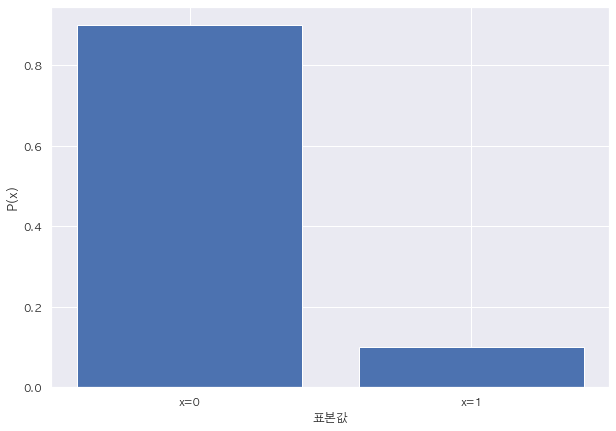

In [5]:
# 시각화
plt.bar(xx, rv.pmf(xx))
plt.xticks([0, 1], ['x=0', 'x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.show()

주사위를 한개 던져 3이 나올 확률

In [7]:
# 주사위 던져 뭔가 나오는 확률
mu = 1 / 6
# 베르누이 시행
rv = stats.bernoulli(mu)
# 베르누이 확률변수
xx = [1, 0]
# 확률질량함수
print(f'3이 나올 확률: {rv.pmf(xx)[0]}, 3이 나오지 않을 확률: {rv.pmf(xx)[1]}')

3이 나올 확률: 0.16666666666666669, 3이 나오지 않을 확률: 0.8333333333333334


### 이항 분포
- 연속된 n번의 독립적 시행에서 각 시행이 확률 p를 가질 때의 이산 확률 분포이다. 이러한 시행은 베르누이 시행이라고 불리기도 한다. 사실, n=1일 때 이항 분포는 베르누이 분포이다.


베르누이분포를 따르는 확률변수 $Y$의 확률질량함수를 대입하여 정리하면 이항분포 확률변수 $X$의 확률질량함수는 다음과 같아진다.

$$
\begin{align}
\text{Bin}(x;N,p) = \binom N x \; p^x(1-p)^{N-x}
\tag{1}
\end{align}
$$

이 식에서 $\binom N x$ 기호는 **조합(combination)**이라는 기호로 $N$개 원소 중에 $x$개 원소를 순서와 상관없이 선택할 수 있는 경우의 수를 뜻한다. 조합은 다음 공식으로 계산할 수 있다.

$$
\begin{align}
\binom N x =\dfrac{N!}{x!(N-x)!}
\tag{2}
\end{align}
$$

$!$ 기호는 **팩토리얼(factorial)**이라고 하며 다음처럼 정의한다.

$$
\begin{align}
N! = N\cdot (N-1) \cdots 2 \cdot 1
\tag{3}
\end{align}
$$



In [16]:
# 계산
(1 / 6) ** 3 * (5 / 6) ** 7 * comb(10, 3)

0.1550453595742519

In [17]:
# binom메소드 사용
n = 10
mu = 1 / 6
rv = stats.binom(n, mu)
rv.pmf(3)

0.15504535957425197

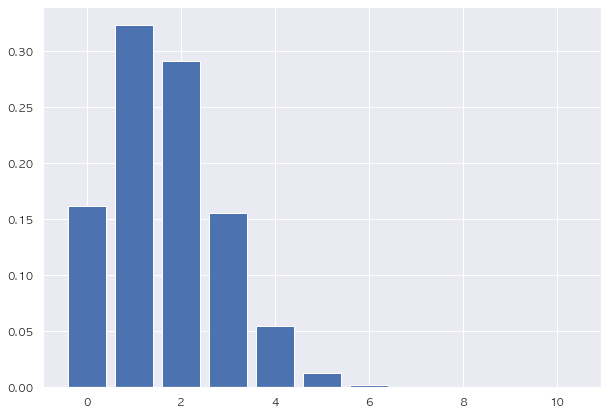

In [18]:
# 시각화
# 몇 번 나오느냐에 대한 확률 
xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx))
plt.show()

한 축구 선수가 패널티킥을 차면 5번 중 4번은 성공한다고 한다. 그럼 이 선수가 10번의 패널티킥을 차서 7번 성공할 확률을 구하시오.

In [19]:
# 계산
(4 / 5) ** 7 * (1 / 5) ** 3 * comb(10, 7)

0.2013265920000001

In [20]:
# binom메소드 사용
n = 10
mu = 4 / 5
rv = stats.binom(n, mu)
rv.pmf(7)

0.20132659200000014

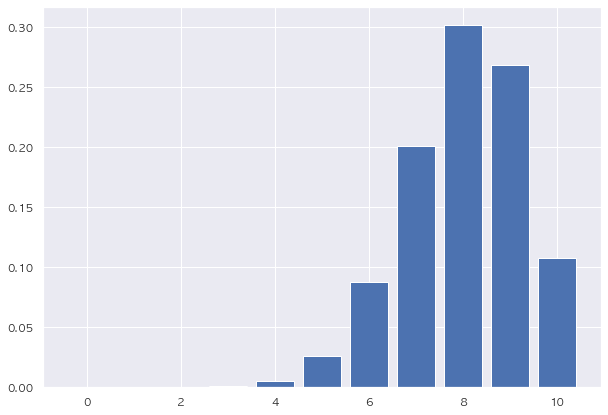

In [23]:
# 시각화 
# 몇 번 성공하냐에 따른 확률
xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx))
plt.show()

스마트폰의 한 부품을 만드는 회사가 있다. 이 회사의 불량률은 5%라고 한다

그럼 부품 20개를 조사했을 때, 불량품이 2개 이하로 나올 확률을 구하시오

In [25]:
n = 20
mu = 0.05
rv = stats.binom(n, mu)
# 불량품 0개, 1개, 2개 나올 확률을 더한다
rv.pmf([0, 1, 2]).sum()

0.9245163262115033

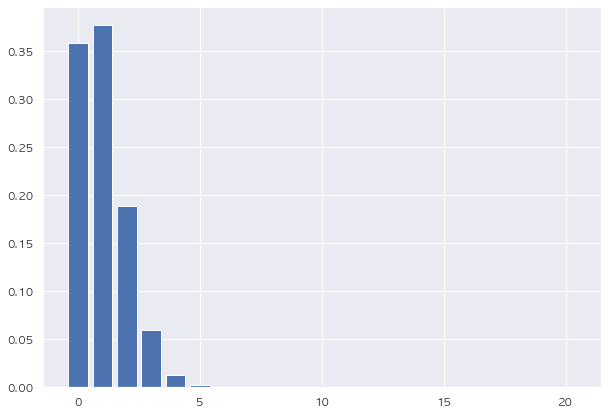

In [26]:
# 시각화
xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx))
plt.show()

어떤 희귀바이러스에 감염되었을 때, 회복할 수 있는 치료율은 20%라고 한다. 

바이러스에 감염된 환자 15명을 치료했을 때, 적어도 2명 이상은 회복할 확률을 구하시오

In [32]:
n = 15
mu = 0.2
rv = stats.binom(n, mu)
# 전체 확률에서 0명, 1명 회복할 확률을 뺀다
1 - rv.pmf([0, 1]).sum()

0.832874232578048

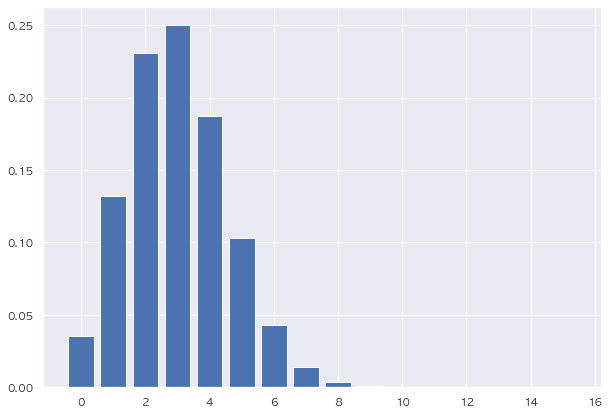

In [33]:
# 시각화
xx = np.arange(n + 1)
plt.bar(xx, rv.pmf(xx))
plt.show()